In [1]:
import pandas as pd
import math

In [2]:
def load_csv(file_path):
    df = pd.read_csv(file_path, header=None)
    return df

In [59]:
def ez_rel(example, fill_col=2, cand=0):
    valid = example[fill_col].dropna()
    number = len(valid)
    cands = ['+', '-1', '-2','*','/1','/2','max','min','avg']
    for i in range(len(cands)):
        cand = i
        pos = True
        for j in range(number):
            if cands[cand]=="+" and (not math.isclose(example[0][j]+example[1][j], example[2][j], abs_tol=0.001)):
                pos = False
            elif cands[cand]=="-1" and (not math.isclose(example[0][j]-example[1][j], example[2][j], abs_tol=0.001)):
                pos = False
            elif cands[cand]=="-2" and (not math.isclose(example[1][j]-example[0][j], example[2][j], abs_tol=0.001)):
                pos = False
            elif cands[cand]=="*" and (not math.isclose(example[0][j]*example[1][j], example[2][j], abs_tol=0.001)):
                pos = False
            elif cands[cand]=="/1":
                try:
                    temp = example[0][j]/example[1][j]
                except ZeroDivisionError:
                    temp = 0
                if not math.isclose(temp, example[2][j]):
                    pos = False 
            elif cands[cand]=="/2":
                try:
                    temp = example[1][j]/example[0][j]
                except ZeroDivisionError:
                    temp = 0
                if not math.isclose(temp, example[2][j]):
                    pos = False 
            elif cands[cand]=="max" and (not math.isclose(max(example[0][j], example[1][j]), example[2][j], abs_tol=0.001)):
                pos = False 
            elif cands[cand]=="min" and (not math.isclose(min(example[0][j], example[1][j]), example[2][j], abs_tol=0.001)):
                pos = False
            elif cands[cand]=="avg" and (not math.isclose((example[0][j]+example[1][j])/2, example[2][j], abs_tol=0.001)):
                pos = False        
            if not pos:
                break
        if pos:
            return cands[cand], cand
    return None, cand

In [5]:
from ez_numeric_2cols import ez_rel

example = load_csv("../tests/col1_divide_col2.csv")
ez_rel(example)

/Users/arya/cs6386/6386-spreadsheet/src/ez_numeric_2cols.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  temp = example[0][j]/example[1][j]


(None, 8)

In [6]:
from multiple_rows import multiple_row_sum_avg, fill_multiple_row_sum_avg

example1 = load_csv("../tests/avg_of_three_rows.csv")
op, result = multiple_row_sum_avg(example1)
# print(op, result)

filled = fill_multiple_row_sum_avg(example1, op, result)
# print(filled)

expected = load_csv("../tests/avg_of_three_rows_expected.csv")
# print(expected.compare(filled))
pd.testing.assert_frame_equal(expected, filled, check_dtype = False, atol = 0.01)

In [3]:
from multiple_rows import filter_sum_avg, fill_filter_sum_avg

example2 = load_csv("../tests/filter_on_col1_avg.csv")
col, op = filter_sum_avg(example2)
# print(col, op)

filled2 = fill_filter_sum_avg(example2, col, op)
# print(filled2)

expected2 = load_csv("../tests/filter_on_col1_avg_expected.csv")
# print(expected2.compare(filled2))
pd.testing.assert_frame_equal(expected2, filled2, check_dtype = False, atol = 0.01)


In [4]:
from multiple_rows import filter_count, fill_filter_count

example3 = load_csv("../tests/filter_on_col_count.csv")
trial = filter_count(example3)
# print(trial)

filled = fill_filter_count(example3, trial)
# print(filled)

expected = load_csv("../tests/filter_on_col_count_expected.csv")
# print(expected.compare(filled))
pd.testing.assert_frame_equal(expected, filled, check_dtype = False, atol = 0.01)

In [3]:
from weighted_col import weighted_sum, fill_weighted_sum

example4 = load_csv("../tests/weighted_sum_of_two_cols_2.csv")
trial, w1, w2 = weighted_sum(example4)
# print(trial, w1, w2)

filled = fill_weighted_sum(example4, trial, w1, w2)
# print(filled)

expected = load_csv("../tests/weighted_sum_of_two_cols_2_expected.csv")
# print(expected.compare(filled))
pd.testing.assert_frame_equal(expected, filled, check_dtype = False, atol = 0.01)

In [ ]:
from empty_entries import remove_empty_entries

example5 = load_csv("../tests/sum_of_two_col_missing_entry.csv")
remove_empty_entries(example5)

In [ ]:
from tailing import tailing

example6 = load_csv("../tests/sum_with_extra_col_row.csv")
tailing(example6)

In [ ]:
from main import *

filled = autofill("../tests/avg_of_three_rows.csv")
# print(filled)
check(filled, "../tests/avg_of_three_rows_expected.csv")

In [4]:
from main import *
from weighted_col import *

file = "../tests/weighted_negative_sum_of_three_cols.csv"
example4 = load_csv(file)
# weighted= weighted_sum(example4)
# result = fill_weighted_sum(example4, weighted)
result = autofill(example4)

file = file[:-4] + "_expected.csv"
check(result, file)

/Users/arya/cs6386/6386-FinalProject/src/ez_numeric_2cols.py:24: RuntimeWarning: divide by zero encountered in scalar divide
  temp = example[0][j]/example[1][j]


/Users/arya/cs6386/6386-FinalProject/src/ez_numeric_2cols.py:24: RuntimeWarning: divide by zero encountered in scalar divide
  temp = example[0][j]/example[1][j]
/Users/arya/cs6386/6386-FinalProject/src/ez_numeric_2cols.py:24: RuntimeWarning: divide by zero encountered in scalar divide
  temp = example[0][j]/example[1][j]
/Users/arya/cs6386/6386-FinalProject/src/ez_numeric_2cols.py:24: RuntimeWarning: divide by zero encountered in scalar divide
  temp = example[0][j]/example[1][j]
/Users/arya/cs6386/6386-FinalProject/src/ez_numeric_2cols.py:24: RuntimeWarning: divide by zero encountered in scalar divide
  temp = example[0][j]/example[1][j]


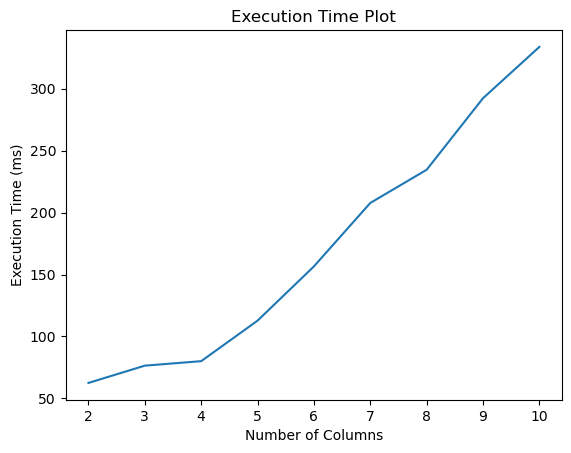

In [25]:
weighted_sum_plot()